##  경사 하강법

- a를 무한대로 키우거나 무한대로 작게 할 때 오차도 무한대로 커지는 관계는 이차함수 그래프로 표현 가능
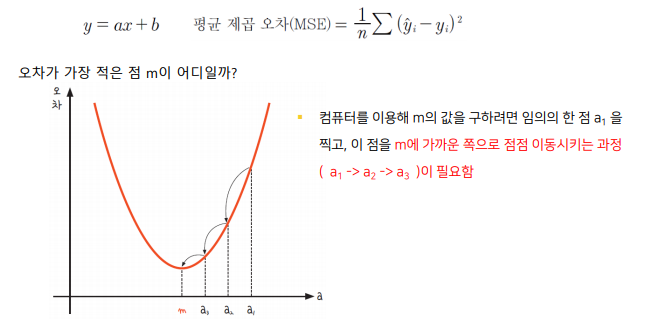
- 적절한 기울기 a값을 찾았을 때 오차가 최소화

- **경사하강법**
1. 미분기울기를 이용하여 그래프에서 오차를 비교하여 가장 작은 방법으로 이동시키는 방법

- $ y= x^2 $ 그래프에서 x에 다음과 같이 $ a_1,a_2 $ 그리고 m을 대입하여 그 자리에서 미분시 각 점에서의 순간기울기 그려짐  

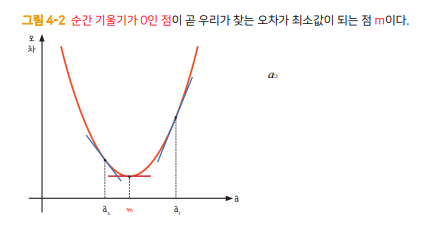

- 여기서 눈여겨 봐야 할 것은 우리가 찾는 최솟값 m에서의 순간 기울기임
- 그래프가 이차 함수 포물선이므로 꼭짓점의 기울기는 x축과 평행한 선이 됨. 즉, 기울기가 0
- 즉 목표는 **미분 값이 0인 지점** 찾기
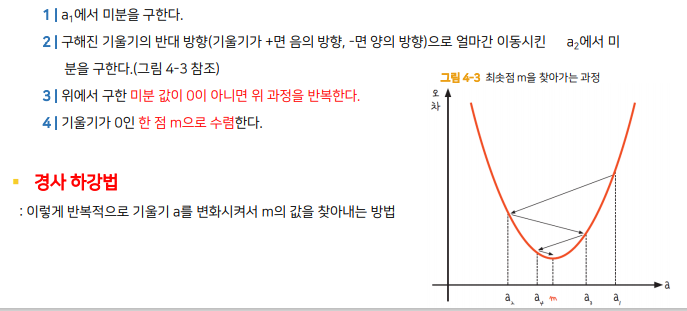

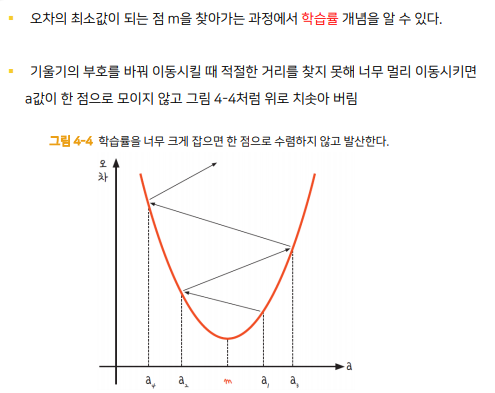

-----
- **학습률** : 어느 만큼 이동시킬지를 신중히 결정해야 하는데, 이때 이동 거리를 정해주는 것
- 딥러닝에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화(optimization) 과정 중 하나


- **경사 하강법**
- 최적의 b값을 구할 때 역시 경사 하강법을 사용한다.
- b값이 너무 크면 오차도 함께 커지고, 너무 작아도 오차가 커진다

- <h3>평균 제곱 오차의 식 $ \frac{1}{n} \sum (\hat{y_i} - y_i)^2$</h3><br>

- <h3>여기서 $ \hat{y_i} $ 은 $ x_i $를 집어넣은 값이므로 $ y_i = ax_i + b $ 면 $ \frac{1}{n} \sum ((ax_i + b) - y_i)^2$</h3><br>

- ※ 이값 미분시 우리가 필요한 값은 a,b 그러므로 a,b중심으로 미분<br><br>

- <h3>a로 편미분한 결과 = $ \frac{2}{n} \sum (ax_i + b - y_i)x_i$</h3><br>

- <h3>b로 편미분한 결과 = $ \frac{2}{n} \sum (ax_i + b - y_i)$</h3><br>

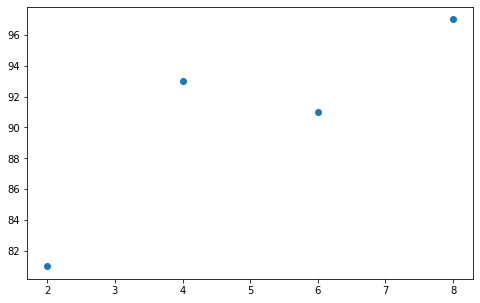

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 x 성적 y
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 표현
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

In [17]:
x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0

# 학습률 
lr = 0.03

# epoch 반복
epochs = 2001

# 경사 하강법
for epoch in range(epochs):
    y_hat = a * x_data + b
    error = y_data - y_hat  # 오차 ( 실제값 - 예측값 )
    a_diff = -(2 / len(x_data)) * sum(x_data * error) # 오차함수를 a 미분
    b_diff = -(2 / len(x_data)) * sum(error) # 오차함수를 b 미분
    a = a - lr * a_diff # 학습률 곱해 a값 업데이트 오차값 감소
    b = b - lr * b_diff # 학습률 곱해 b값 업데이트 오차값 감소
    if epoch % 100 == 0:
        print("epoch:[{}/{}], 기울기=%.04f, 절편=%.04f".format(epoch, epochs)%(a, b))

epoch:[0/2001], 기울기=27.8400, 절편=5.4300
epoch:[100/2001], 기울기=7.0739, 절편=50.5117
epoch:[200/2001], 기울기=4.0960, 절편=68.2822
epoch:[300/2001], 기울기=2.9757, 절편=74.9678
epoch:[400/2001], 기울기=2.5542, 절편=77.4830
epoch:[500/2001], 기울기=2.3956, 절편=78.4293
epoch:[600/2001], 기울기=2.3360, 절편=78.7853
epoch:[700/2001], 기울기=2.3135, 절편=78.9192
epoch:[800/2001], 기울기=2.3051, 절편=78.9696
epoch:[900/2001], 기울기=2.3019, 절편=78.9886
epoch:[1000/2001], 기울기=2.3007, 절편=78.9957
epoch:[1100/2001], 기울기=2.3003, 절편=78.9984
epoch:[1200/2001], 기울기=2.3001, 절편=78.9994
epoch:[1300/2001], 기울기=2.3000, 절편=78.9998
epoch:[1400/2001], 기울기=2.3000, 절편=78.9999
epoch:[1500/2001], 기울기=2.3000, 절편=79.0000
epoch:[1600/2001], 기울기=2.3000, 절편=79.0000
epoch:[1700/2001], 기울기=2.3000, 절편=79.0000
epoch:[1800/2001], 기울기=2.3000, 절편=79.0000
epoch:[1900/2001], 기울기=2.3000, 절편=79.0000
epoch:[2000/2001], 기울기=2.3000, 절편=79.0000


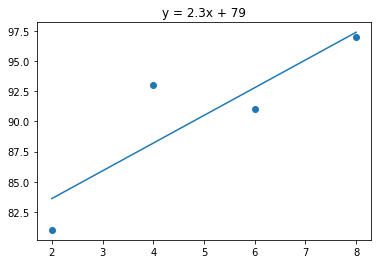

In [21]:
y_pred = a * x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.title("y = 2.3x + 79")
plt.show()

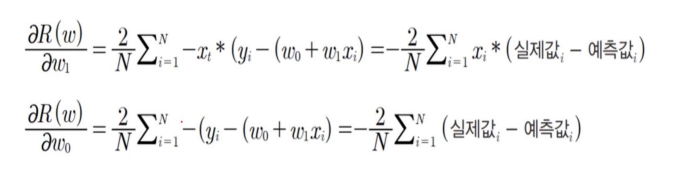

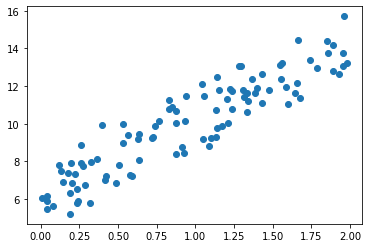

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 0 ~ 0.99 * 2 = 0 ~ 1.99
y = 4 * X + 6 + np.random.randn(100, 1) # noise 만들기 위한 randn(-0.99 ~ 0.99)
plt.scatter(X, y)

In [39]:
# w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배역 계산하고 예측과 실제 값 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N, 1))
    
    w1_update = -(2/N) * learning_rate * (x)
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [40]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

y_pred = np.dot(X, w1.T) + w0
diff = y - y_pred
print(diff.shape)
w0_factors = np.ones((100, 1))
w1_update = -(2/100) * 0.01 * (np.dot(X.T, diff))
w0_update = -(2/100) * 0.01 * (np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [43]:
# 반복적으로 경사 하강법 이용해 w1 w0 업데이트
def gradient_descent_steps(X, y, iters = 10000):
    
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1)) 
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [44]:
# 예측 오차 비용
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


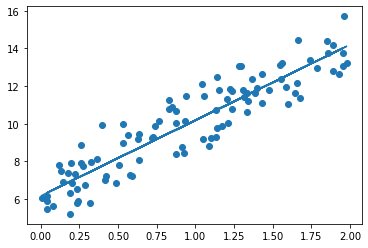

In [45]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [46]:

def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y,
                                                 learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [47]:

w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1 : ', round(w1[0,0], 3),'w0 : ', round(w0[0,0],3))
y_pred = w1[0,0] * X +w0
print('Stochastic Gradient Descent : {0:.4f}'.format(get_cost(y, y_pred)))

w1 :  4.028 w0 :  6.156
Stochastic Gradient Descent : 0.9937


### Multi-Linear-Regression
- 더 정확한 예측을 하려면 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측값을 구하려면 변수의 개수를 늘려 **다중 선형 회귀**를 만들어 주어야 함<br><br>
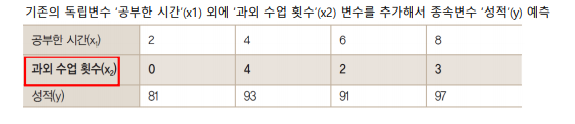
- 두개의 독립변수 $ x_1, x_2 $ 생성<br><br>

- 즉 식은 $ y = a_1x_1 + a_2x_2 + b $<br><br>

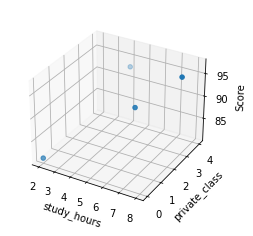

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

In [49]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
# 기울기 a와 절편 b의 값을 초기화 합니다.
a1 = 0
a2 = 0
b = 0
#학습률을 정합니다.
lr = 0.02
#몇 번 반복될지를 설정합니다.(0부터 세므로 원하는 반복 횟수에 +1을 해 주어야 합니다.)
epochs = 2301
#경사 하강법을 시작합니다.
for i in range(epochs): # epoch 수 만큼 반복
    y_pred = a1 * x1_data + a2 * x2_data + b  #y를 구하는 식을 세웁니다
    error = y_data - y_pred  #오차를 구하는 식입니다.
    a1_diff = -(2/len(x1_data)) * sum(x1_data * (error)) # 오차함수를 a1로 미분한 값입니다.
    a2_diff = -(2/len(x2_data)) * sum(x2_data * (error)) # 오차함수를 a2로 미분한 값입니다.
    b_new = -(2/len(x1_data)) * sum(y_data - y_pred)  # 오차함수를 b로 미분한 값입니다.
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2값을 업데이트합니다.
    b = b - lr * b_new  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a1, a2, b값을 출력합니다.
        print("epoch=%.f, 기울기 a1=%.04f, 기울기 a2=%.04f, 절편 b=%.04f" % (i, a1, a2, b))

epoch=0, 기울기 a1=18.5600, 기울기 a2=8.4500, 절편 b=3.6200
epoch=100, 기울기 a1=7.2994, 기울기 a2=4.2867, 절편 b=38.0427
epoch=200, 기울기 a1=4.5683, 기울기 a2=3.3451, 절편 b=56.7901
epoch=300, 기울기 a1=3.1235, 기울기 a2=2.8463, 절편 b=66.7100
epoch=400, 기울기 a1=2.3591, 기울기 a2=2.5823, 절편 b=71.9589
epoch=500, 기울기 a1=1.9546, 기울기 a2=2.4427, 절편 b=74.7362
epoch=600, 기울기 a1=1.7405, 기울기 a2=2.3688, 절편 b=76.2058
epoch=700, 기울기 a1=1.6273, 기울기 a2=2.3297, 절편 b=76.9833
epoch=800, 기울기 a1=1.5673, 기울기 a2=2.3090, 절편 b=77.3948
epoch=900, 기울기 a1=1.5356, 기울기 a2=2.2980, 절편 b=77.6125
epoch=1000, 기울기 a1=1.5189, 기울기 a2=2.2922, 절편 b=77.7277
epoch=1100, 기울기 a1=1.5100, 기울기 a2=2.2892, 절편 b=77.7886
epoch=1200, 기울기 a1=1.5053, 기울기 a2=2.2875, 절편 b=77.8209
epoch=1300, 기울기 a1=1.5028, 기울기 a2=2.2867, 절편 b=77.8380
epoch=1400, 기울기 a1=1.5015, 기울기 a2=2.2862, 절편 b=77.8470
epoch=1500, 기울기 a1=1.5008, 기울기 a2=2.2860, 절편 b=77.8518
epoch=1600, 기울기 a1=1.5004, 기울기 a2=2.2859, 절편 b=77.8543
epoch=1700, 기울기 a1=1.5002, 기울기 a2=2.2858, 절편 b=77.8556
epoch=1800, 기울기 a1=1.5